In [1]:
import pickle
sentences = pickle.load(open('./sentences.pkl', 'rb'))

In [4]:
# from gensim.models import Word2Vec
from gensim.models import Word2Vec

ImportError: cannot import name 'Mapping' from 'collections' (c:\Users\vanav\AppData\Local\Programs\Python\Python310\lib\collections\__init__.py)

In [3]:
print(len(sentences))

2385532


In [4]:
input_gensim = []
for sen in sentences:
    input_gensim.append(sen.split())
print(input_gensim[0])

['thành_lập', 'dự_án', 'policy', 'phòng_chống', 'hiv', 'aids', 'vn', 'nlđ', 'quỹ', 'hỗ_trợ', 'khẩn_cấp', 'về', 'aids', 'của', 'hoa', 'kỳ', 'vừa', 'thành_lập', 'dự_án', 'policy', 'tại', 'vn', 'với', 'cam_kết', 'hỗ_trợ', 'chính_phủ', 'và', 'nhân_dân', 'vn', 'đối_phó_hiv', 'aids']


In [6]:
# Tham khảo chi tiết tại : https://github.com/RaRe-Technologies/gensim/blob/develop/gensim/models/word2vec.py
# workers : số core của máy tính -> dữ liệu sẽ được xử lý thành 4 luồng song song
# window : int, optional -> Maximum distance between the current and predicted word within a sentence.
# vector_size : int, optional -> Dimensionality of the word vectors.
# min_count : int, optional -> Ignores (bỏ qua) all words with total frequency lower than this.
# sg : {0, 1}, optional -> Training algorithm: 1 for skip-gram; otherwise CBOW.
model = Word2Vec(input_gensim, vector_size=128, window=5, min_count=0, workers=4, sg=1)
model.wv.save("w2v.model")

In [36]:
import gensim.models.keyedvectors as word2vec
w2v_model = word2vec.KeyedVectors.load('w2v.model')

vocabulary = []
for word in w2v_model.vocab.keys():
    vocabulary.append(word)
print(len(vocabulary))

AttributeError: The vocab attribute was removed from KeyedVector in Gensim 4.0.0.
Use KeyedVector's .key_to_index dict, .index_to_key list, and methods .get_vecattr(key, attr) and .set_vecattr(key, attr, new_val) instead.
See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4

In [11]:
keys = ['đẹp', 'xấu']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in w2v_model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(w2v_model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [12]:
# for word in keys:
#     embeddings = []
#     words = []
#     embeddings.append(w2v_model[word])
#     words.append(word)
    
#     embedding_clusters.append(embeddings)
#     word_clusters.append(words)
    
# print(word_clusters)

(2, 30, 128)


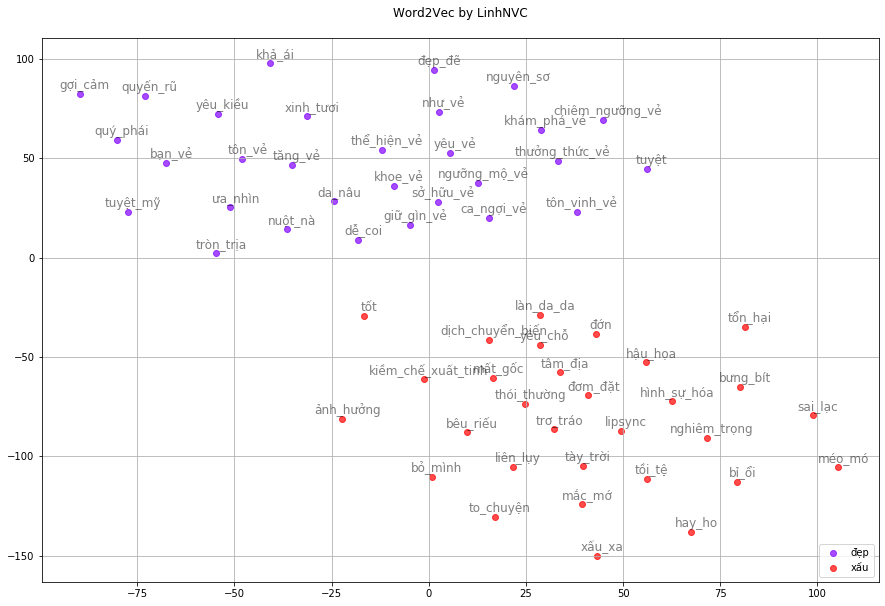

In [14]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
print(embedding_clusters.shape)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


import matplotlib.pyplot as plt
import matplotlib.cm as cm
# % matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(15, 10))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=np.array([color,]), alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='center', va='bottom', size=12)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Word2Vec by LinhNVC\n', keys, embeddings_en_2d, word_clusters, 0.7,
                        'output.png')

